In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [105]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [106]:
df.shape

(891, 15)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [108]:
df.describe(include = ["O"])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [109]:
df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [57]:
#Which factor was affected amongst the ones who survived

In [110]:
df[["sex", "survived"]].groupby("sex", as_index = False).mean()

,sex,survived
0,female,0.742038
1,male,0.188908


In [111]:
df[["pclass", "survived"]].groupby("pclass", as_index = False).mean()

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [112]:
ages = pd.cut(df["age"], bins = [0,13,20,30,40,50,60,70,80], labels =["children","teens", "20s", "30s","40s","50s","60s","70s"])

In [113]:
df["AgeBand"] = ages

In [114]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeBand
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,20s
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,teens
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,20s
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,30s


In [115]:
df[["AgeBand", "survived"]].groupby("AgeBand", as_index = False).mean()

,AgeBand,survived
0,children,0.591549
1,teens,0.370370
2,20s,0.365217
3,30s,0.445161
4,40s,0.383721
5,50s,0.404762
6,60s,0.235294
7,70s,0.200000


<AxesSubplot:xlabel='survived', ylabel='count'>

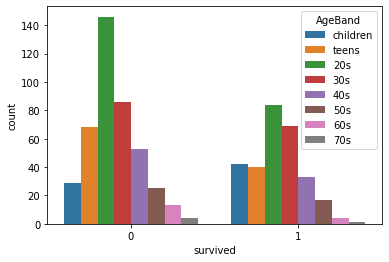

In [116]:
sns.countplot(x = "survived", hue = "AgeBand", data = df)

In [118]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [119]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort = False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()

    plt.plot(aspect = "auto")
    plt.pie(feature_ratio, labels = feature_index, autopct="%1.1f%%")
    plt.title(feature + "\'s ratio in total")
    plt.show()
    
    for i,index in enumerate(feature_index):
        plt.subplot(1, feature_size +1, i + 1, aspect = "equal")
        plt.pie([survived[index], dead[index]], labels = ["Alive", "Dead"], autopct="%1.1f%%")
        plt.title(str(index) + "\'s ratio")

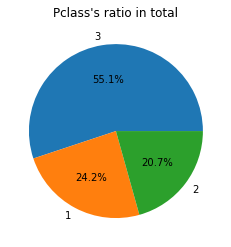

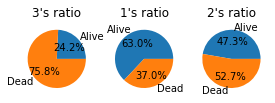

In [69]:
pie_chart("Pclass")

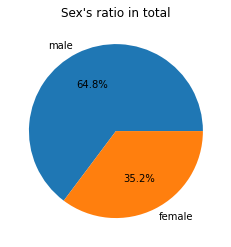

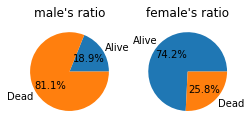

In [121]:
pie_chart("Sex")

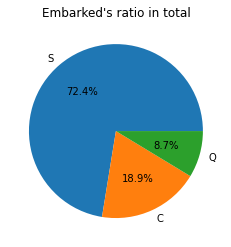

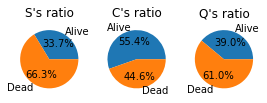

In [122]:
pie_chart("Embarked")

In [123]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "dead"]
    df.plot(kind = "bar", stacked = True, figsize=(10,5))

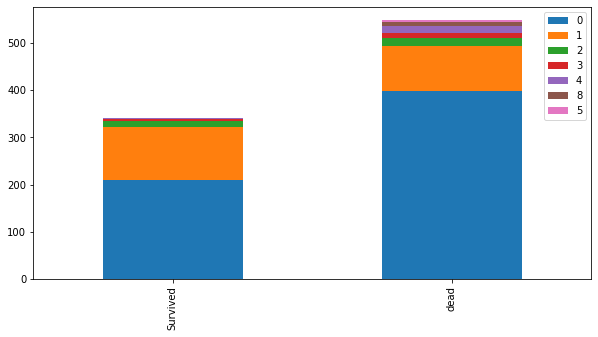

In [124]:
bar_chart("SibSp")

In [125]:
train_and_test = [train,test]

In [126]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [127]:
for dataset in train_and_test:
    dataset["title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [128]:
pd.crosstab(train["title"], train["Sex"])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [129]:
for dataset in train_and_test:
    dataset["title"] = dataset["title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Rev","Sir"],"Other")
    dataset["title"] = dataset["title"].replace("Mlle", "Miss")
    dataset["title"] = dataset["title"].replace("Mme", "Mrs")
    dataset["title"] = dataset["title"].replace("Ms", "Miss")

In [130]:
train[["title","Survived"]].groupby(["title"],as_index = False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [131]:
for dataset in train_and_test:
     dataset["title"] =  dataset["title"].astype(str)

In [132]:
for dataset in train_and_test:
     dataset["Sex"] =  dataset["Sex"].astype(str)

In [133]:
train["Embarked"].value_counts(dropna= False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [78]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeBand
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30s
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30s
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,50s
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,children
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,40s
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,30s
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,50s
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,teens


In [134]:
for dataset in train_and_test:
    dataset["Embarked"] =  dataset["Embarked"].fillna('S')
    dataset["Embarked"] =  dataset["Embarked"].astype(str)

In [135]:
for dataset in train_and_test:
    dataset["Age"].fillna(dataset["Age"].mean(), inplace = True)
    dataset["Age"] = dataset["Age"].astype(int)
    train["AgeBand"] = pd.cut(train["Age"], 5)
print(train["AgeBand"])

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]


In [136]:
for dataset in train_and_test:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4

In [137]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset["Family"] = dataset["Family"].astype(int)

In [138]:
features_drop = ["Name", "Ticket", "Cabin", "SibSp", "Parch", "Fare"]
train = train.drop(features_drop,axis = 1)
test = test.drop(features_drop, axis = 1)

train = train.drop(["PassengerId","AgeBand"], axis= 1)

In [139]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,title,Family
0,0,3,male,1,S,Mr,1
1,1,1,female,2,C,Mrs,1
2,1,3,female,1,S,Miss,0
3,1,1,female,2,S,Mrs,1
4,0,3,male,2,S,Mr,0


In [140]:
train_and_test[0] = train

In [141]:
train_and_test[1] = test

In [142]:
train

,Survived,Pclass,Sex,Age,Embarked,title,Family
0,0,3,male,1,S,Mr,1
1,1,1,female,2,C,Mrs,1
2,1,3,female,1,S,Miss,0
3,1,1,female,2,S,Mrs,1
4,0,3,male,2,S,Mr,0
...,...,...,...,...,...,...,...
886,0,2,male,1,S,Other,0
887,1,1,female,1,S,Miss,0
888,0,3,female,1,S,Miss,3
889,1,1,male,1,C,Mr,0


In [143]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,title,Family
0,0,3,male,1,S,Mr,1
1,1,1,female,2,C,Mrs,1
2,1,3,female,1,S,Miss,0
3,1,1,female,2,S,Mrs,1
4,0,3,male,2,S,Mr,0


In [144]:
import pickle

with open("dataFrame.pickle", "wb") as f:
    pickle.dump(train_and_test, f)

In [145]:
import pickle
with open("dataFrame.pickle", "rb") as f:
    data = f

In [146]:
data

<_io.BufferedReader name='dataFrame.pickle'>

In [147]:
print(train_and_test)

[     Survived  Pclass     Sex  Age Embarked  title  Family
0           0       3    male    1        S     Mr       1
1           1       1  female    2        C    Mrs       1
2           1       3  female    1        S   Miss       0
3           1       1  female    2        S    Mrs       1
4           0       3    male    2        S     Mr       0
..        ...     ...     ...  ...      ...    ...     ...
886         0       2    male    1        S  Other       0
887         1       1  female    1        S   Miss       0
888         0       3  female    1        S   Miss       3
889         1       1    male    1        C     Mr       0
890         0       3    male    1        Q     Mr       0

[891 rows x 7 columns],      PassengerId  Pclass     Sex  Age Embarked   title  Family
0            892       3    male    2        Q      Mr       0
1            893       3  female    2        S     Mrs       1
2            894       2    male    3        Q      Mr       0
3            8

In [148]:
#HW Review

In [149]:
import pandas as pd
import numpy as np

train_and_test = pd.read_pickle("dataFrame.pickle")

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [151]:
from sklearn.utils import shuffle

In [152]:
train_data, train_label = shuffle(train, train["Survived"], random_state = 0)

In [153]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(test_data, test_label)* 100,2)
    print("Accuracy:", accuracy, "%")
    return prediction

In [157]:
#LR
log_pred = train_and_test(LogisticRegression())

#SVM
svm_pred = train_and_test(SVC())

#kNN
knn_pred = train_and_test(KNeighborsClassifier(n_neighbors = 10))

#rf
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 100))

#NB


ValueError: could not convert string to float: 'male'